# Car Price Prediction Project

## Introduction

In this Jupyter Notebook, we will embark on a data science journey to predict the prices of used cars in Pakistan. Accurate price prediction is crucial in the second-hand car market, where various factors influence a car's value. By leveraging machine learning techniques and a dataset containing information about different car attributes, we aim to build predictive models that can estimate car prices with precision.

### Problem Statement

The main goal of this project is to create a predictive model that can estimate the price of a used car based on its characteristics, such as make, model, year, mileage, and more. This model will be valuable for both buyers and sellers in the used car market, helping them make informed decisions regarding pricing.

### Dataset

We will be working with a dataset that includes information about various cars, such as their make, model, year of manufacture, engine specifications, mileage, and more. Additionally, the dataset contains the actual prices at which these cars were listed or sold. This data will serve as the foundation for training and evaluating our predictive models.

### Approach

Our data science project will follow a structured approach:

1. Data Exploration and Preprocessing: We will start by exploring the dataset, handling missing values, and performing data preprocessing tasks. This step is crucial for ensuring the quality of the data.

2. Feature Engineering: We will identify potential features that could impact car prices and create new features if necessary. For example, we might extract the age of a car from its manufacturing year.

3. Model Building: We will experiment with various machine learning models, including a baseline model and challengers like Random Forest, Support Vector Machine (SVM), and a Neural Network. Cross-validation will be used to evaluate their performance.

4. Model Evaluation: We will use regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared to assess the accuracy of our models.

5. Conclusion: Finally, we will discuss the results from both a data science and business perspective, providing insights into the strengths and weaknesses of each model. We will also discuss how these predictive models can be used effectively in the used car market.

This project aims to demonstrate the power of data science and machine learning in solving real-world problems, making informed decisions, and enhancing the efficiency of industries like the automobile market.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_cars =  pd.read_csv("pakwheels_used_car_data_v02.csv")


## About the Dataset

The **Pakistan Used Car Prices 2023** dataset is a valuable collection of information sourced from PakWheels, a highly regarded platform for buying and selling second-hand cars in Pakistan. This dataset offers a comprehensive view of over 78,000 cars, encompassing 13 distinct features, with the target variable being the price. The features included in this dataset are as follows:

- **ad_ref:** A unique advertisement reference identifier.
- **city:** The city in which the vehicle is advertised and sold.
- **assembly:** Indicates whether the vehicle is locally assembled or imported.
- **body:** Describes the body type of the vehicle.
- **make:** Denotes the manufacturer of the vehicle.
- **model:** Specifies the model variant of the vehicle.
- **year:** Represents the year of production of the vehicle.
- **engine_cc:** Signifies the engine volume in cubic centimeters (cc) of the vehicle.
- **transmission:** Indicates whether the vehicle has an automatic or manual transmission.
- **fuel_type:** Specifies the fuel type, which can be petrol, diesel, or hybrid.
- **color:** Represents the color of the vehicle.
- **registered:** Provides information about the registration city or province of the vehicle.
- **mileage:** Indicates the mileage of the vehicle in kilometers (kms).
- **price:** Represents the price of the vehicle in Pakistani Rupees (PKR).

This dataset is a valuable resource for anyone interested in understanding and analyzing the used car market in Pakistan. It can serve as the foundation for data-driven insights, predictive modeling, and informed decision-making within the automotive industry.

## Dataset Owner

- **Talha Barkaat Ahmad**
- [Dataset Link](https://www.kaggle.com/datasets/talhabarkaatahmad/pakistan-used-car-prices-2023/)


## Data Exploration and Preprocessing

In the initial phase of our data analysis journey, we begin by exploring the dataset to gain a better understanding of its structure and contents. This step is crucial for preparing the data and making it suitable for modeling.


In [3]:
# Display the data set to have an overview of the different features and their values
data_cars

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77873,7775164,Daska,NaN,Sedan,Honda,Civic,2019.0,1800.0,Automatic,Petrol,Taffeta White,Islamabad,58000,5590000.0
77874,7772775,Abbottabad,Imported,Hatchback,Suzuki,Alto,2015.0,660.0,Automatic,Petrol,Brown,Islamabad,65000,2420000.0
77875,7773716,Faisalabad,Imported,Crossover,MG,HS,2021.0,1490.0,Automatic,Petrol,Arctic White,Un-Registered,5000,7500000.0
77876,7322377,Quetta,NaN,Sedan,Suzuki,Baleno,2005.0,1300.0,Manual,Petrol,Silver,Lahore,19000,1250000.0


In [4]:
# Display some analysis on the numerical features
data_cars.describe()

,addref,year,engine,mileage,price
count,7.787800e+04,73099.000000,77875.000000,77878.000000,7.729500e+04
mean,7.809878e+06,2012.812610,1408.072550,91109.192750,3.883232e+06
std,2.599523e+05,7.516685,704.459947,89275.336173,5.759480e+06
min,2.748970e+05,1990.000000,3.000000,1.000000,1.100000e+05
25%,7.805760e+06,2007.000000,1000.000000,34000.000000,1.450000e+06
50%,7.865805e+06,2015.000000,1300.000000,80000.000000,2.700000e+06
75%,7.910334e+06,2019.000000,1600.000000,123456.000000,4.500000e+06
max,7.943741e+06,2022.000000,15000.000000,1000000.000000,5.290000e+08


In [5]:
# Display the type of data and the non-null values
data_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


In [6]:
missing_values = data_cars.isnull().sum()
print(missing_values)

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64



### Handling Missing Values
#### Price Column

First, we focus on the most critical target variable: the "price" column. We observe that there are missing values in the price column. Since price is our target variable and we cannot proceed with incomplete pricing information, we opt to remove rows with missing prices.

#### Other Columns

Moving on to the other columns, we also identify missing values in several features. The strategy for handling missing values varies based on the nature of the data:

 - **Numeric Features**

For numeric features such as "year," "engine_cc," and "mileage," we will replace missing values with the median value of each respective feature. This approach helps preserve the overall distribution of the data and ensures that numeric features remain informative.

 - **Categorical Features**

For categorical features like "assembly" and "color," we will replace missing values with "Unknown" to indicate that we have no information about these categories.

 - **Assembly Column**

In the "assembly" column, we will specifically replace missing values with "Local" to denote that the vehicle is locally assembled. This assumption is made as a majority of the vehicles in the dataset are likely to be locally assembled.

#### Column Removal

Additionally, we have decided to remove the "addref" column from our dataset as it does not provide significant information for our analysis and modelinary


### Summary

By addressing missing values and appropriately handling them, we ensure that our dataset is complete and ready for further analysis and modeling. The next steps will involve feature engineering, model selection, and evaluation to predict used car prices effectively.

In [7]:
# Replacement on null values
data_cars = data_cars.dropna(subset=['price'])
data_cars.reset_index(drop=True, inplace=True)
data_cars.loc[data_cars['assembly'].isnull(), 'assembly'] = 'Local'
data_cars.loc[data_cars['body'].isnull(), 'body'] = 'Unknown'
data_cars.loc[data_cars['year'].isnull(), 'year'] = data_cars['year'].median()
data_cars.loc[data_cars['engine'].isnull(), 'engine'] = data_cars['engine'].median()
data_cars.loc[data_cars['fuel'].isnull(), 'fuel'] = 'Unknown'
data_cars.loc[data_cars['color'].isnull(), 'color'] = 'Unknown'

In [8]:
missing_values = data_cars.isnull().sum()
print(missing_values)

addref          0
city            0
assembly        0
body            0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
color           0
registered      0
mileage         0
price           0
dtype: int64


In [9]:
# Remove duplicated rows (in our case no duplicate)
data_cars.duplicated().sum()

0

### Outlier Removal Process

Outliers are data points that significantly deviate from the majority of the data in a dataset. They can skew statistical analyses and machine learning models. In this section, we will describe the process of identifying and handling outliers in the dataset using the Winsorization technique.

#### Winsorization

Winsorization is a method used to handle outliers by capping or truncating extreme values. The process involves setting a lower threshold (often the 5th percentile) and an upper threshold (often the 95th percentile). Any data point below the lower threshold is replaced with the lower threshold value, and any data point above the upper threshold is replaced with the upper threshold value. This helps bring extreme values within a reasonable range while preserving the overall distribution of the data.

#### Steps:

1. **Identify Target Columns:** We start by selecting the columns in the dataset where we suspect the presence of outliers. In this case, the columns chosen for Winsorization are 'engine', 'mileage', and 'price'.

2. **Set Lower and Upper Percentiles:** For each selected column, we determine the lower and upper percentiles (5th and 95th percentiles, respectively) to set the threshold values for Winsorization.

3. **Calculate Thresholds:** The lower and upper thresholds are calculated based on the percentiles determined in the previous step.

4. **Apply Winsorization:** We apply the Winsorization process to each selected column. Any data point below the lower threshold is set to the lower threshold value, and any data point above the upper threshold is set to the upper threshold value.

5. **Visualize Changes:** After Winsorization, we visualize the distributions of the columns using histograms to see how the process affected the data. We also use boxplots to visualize the presence of outliers before and after Winsorization.

By following these steps, we can effectively handle outliers in the dataset, ensuring that they do not negatively impact subsequent data analyses or machine learning models. Winsorization provides a way to mitigate the influence of extreme values while preserving the integrity of the dataset's overall distribution.


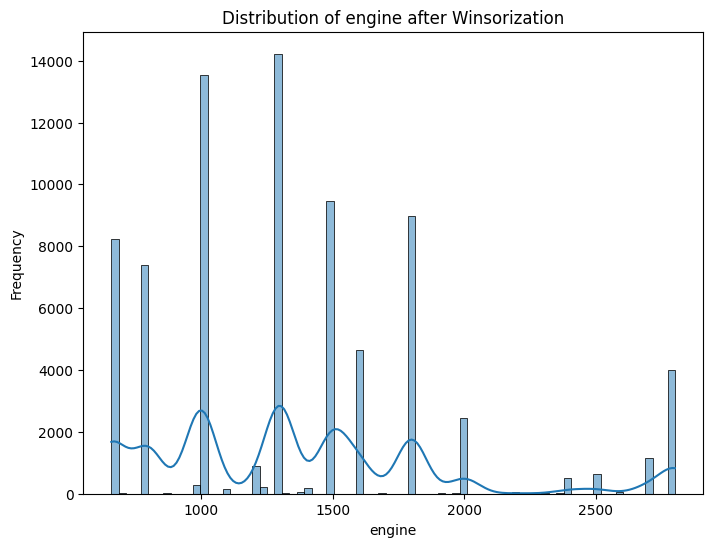

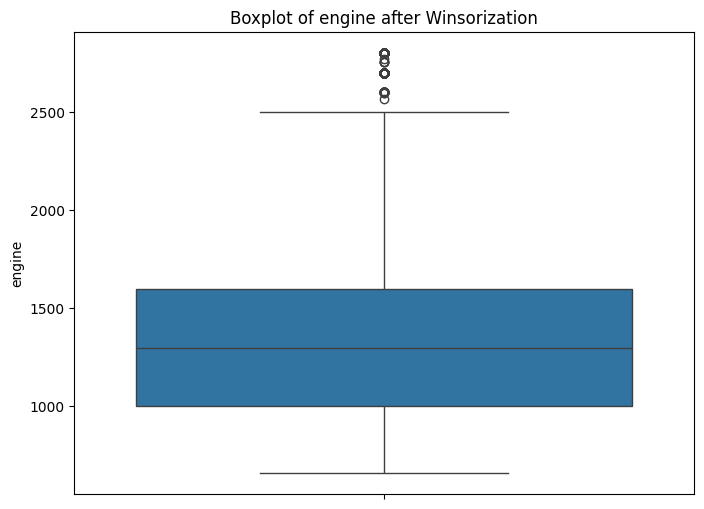

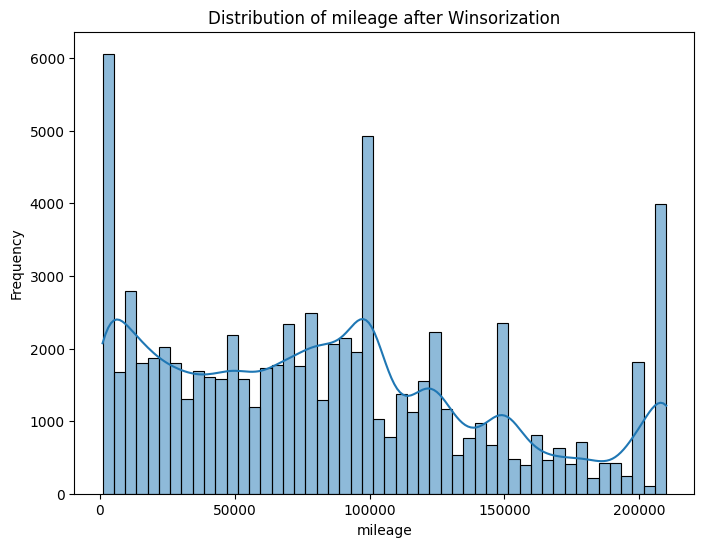

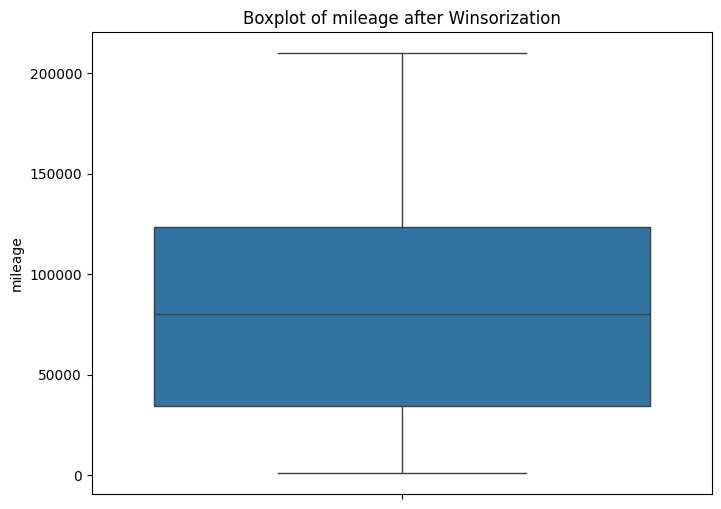

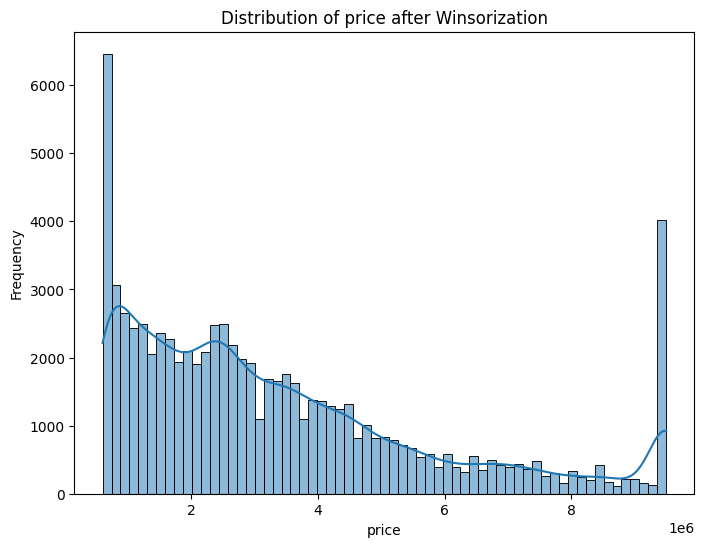

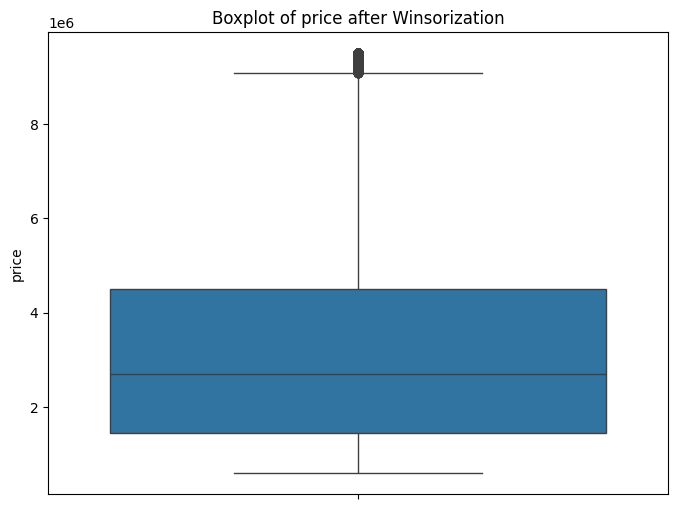

In [10]:
outliers_col = ['engine', 'mileage', 'price']

for col in outliers_col:

    lower_percentile = 5
    upper_percentile = 95

    lower_threshold = np.percentile(data_cars[col], lower_percentile)
    upper_threshold = np.percentile(data_cars[col], upper_percentile)
    
    data_cars.loc[data_cars[col] < lower_threshold, col] = lower_threshold
    data_cars.loc[data_cars[col] > upper_threshold, col] = upper_threshold
    
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data_cars, x=col, kde=True)
    plt.title(f'Distribution of {col} after Winsorization')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_cars, y=col)
    plt.title(f'Boxplot of {col} after Winsorization')
    plt.ylabel(col)
    plt.show()

### Treatment of Categorical Variables

In the process of preparing the dataset for modeling, various categorical variables were encountered, each requiring a specific approach to enhance their contribution to the predictive power of the model. Below, we outline the strategies employed for handling these categorical features:

#### 1. Body Category and Model
For the 'body' and 'model' categories, which contained a multitude of distinct values, it was necessary to reduce dimensionality to improve model training efficiency. To achieve this, we grouped similar 'body' and 'model' types into more manageable subcategories based on shared characteristics. Subsequently, these subcategories were replaced with their respective median prices. This transformation not only reduced the number of unique categories but also revealed a strong correlation between these subcategories and the price, aiding in model interpretability.

#### 2. Brands and Colors
Similarly, the 'make' (brands) and 'color' attributes underwent a transformation to enhance their impact on the model. Brands were mapped to their corresponding median prices, allowing for a simplified representation of brand prestige and pricing trends. For colors, we noticed that certain colors such as white and black commanded higher median prices compared to others like pink, green, yellow, beige, and brown. To capture this relationship, we converted the color feature into a numerical variable while minimizing the introduction of additional features.

#### 3. Assembly, Transmission, and Fuel
As for the 'assembly,' 'transmission,' and 'fuel' categories, these variables had fewer distinct values, making them ideal candidates for one-hot encoding. This technique expanded these categorical variables into binary columns, with each column representing a specific category. A '1' indicated the presence of that category for a particular observation, while '0' represented its absence. This encoding method effectively captured the limited variations within these attributes without the need for extensive dimensionality reduction.

In summary, the treatment of categorical variables involved a combination of dimensionality reduction through subcategories and feature engineering to encode valuable information while maintaining the interpretability of the model. These strategies aim to empower the machine learning model to make more accurate predictions by incorporating essential categorical information into the predictive framework.


In [11]:
categorial_features = ["body", "make", "model", "transmission", "color", "registered"]
for feature in categorial_features:
    distinct_list = data_cars[feature].unique()
    distinct_sum = len(distinct_list)
    print(f"{feature}: \ndistinct= {distinct_sum} \nlist= {distinct_list}\n")

body: 
distinct= 22 
list= ['Sedan' 'Hatchback' 'SUV' 'MPV' 'Unknown' 'Crossover' 'Micro Van'
 'Mini Van' 'Double Cabin' 'Compact sedan' 'High Roof' 'Van' 'Compact SUV'
 'Pick Up' 'Coupe' 'Station Wagon' 'Convertible' 'Truck'
 'Off-Road Vehicles' 'Mini Vehicles' 'Single Cabin' 'Compact hatchback']

make: 
distinct= 68 
list= ['Toyota' 'Honda' 'Suzuki' 'Daihatsu' 'Mitsubishi' 'Hyundai' 'KIA'
 'Nissan' 'Adam' 'Mazda' 'Lexus' 'Mercedes' 'BMW' 'Changan' 'DFSK' 'FAW'
 'Proton' 'Haval' 'MG' 'Volkswagen' 'Range' 'Audi' 'Land' 'Peugeot'
 'United' 'Subaru' 'Jeep' 'Tesla' 'Chevrolet' 'Prince' 'Chery' 'Porsche'
 'GMC' 'Daewoo' 'MINI' 'Datsun' 'Ford' 'Volvo' 'BAIC' 'Bentley' 'Jaguar'
 'Cadillac' 'Chrysler' 'Hino' 'Isuzu' 'Fiat' 'Willys' 'Sogo' 'Dodge'
 'Power' 'SsangYong' 'Daehan' 'JAC' 'JW' 'GAC' 'Austin' 'Opel' 'ZOTYE'
 'Master' 'Genesis' 'Others' 'Buick' 'Mushtaq' 'Hummer' 'JMC' 'Roma'
 'Classic' 'Rinco']

model: 
distinct= 432 
list= ['Corolla' 'City' 'Yaris' 'Swift' 'Civic' 'Move' 'Mehran' 'M

In [ ]:
body_categories = {
    'Sedan': 'Sedan',
    'Hatchback': 'Hatchback',
    'SUV': 'SUV',
    'MPV': 'MPV',
    'Unknown': 'Other',
    'Crossover': 'SUV',
    'Micro Van': 'Van',
    'Mini Van': 'Van',
    'Double Cabin': 'Truck',
    'Compact sedan': 'Sedan',
    'High Roof': 'Van',
    'Van': 'Van',
    'Compact SUV': 'SUV',
    'Pick Up': 'Truck',
    'Coupe': 'Coupe',
    'Station Wagon': 'Wagon',
    'Convertible': 'Convertible',
    'Truck': 'Truck',
    'Off-Road Vehicles': 'Off-Road',
    'Mini Vehicles': 'Other',
    'Single Cabin': 'Truck',
    'Compact hatchback': 'Hatchback'
}
data_cars.loc[:,'Body_Category'] = data_cars.loc[:,'body'].map(body_categories)
data_cars.loc[data_cars['Body_Category'].isnull(),'Body_Category'] = 'Other'
data_cars.head()


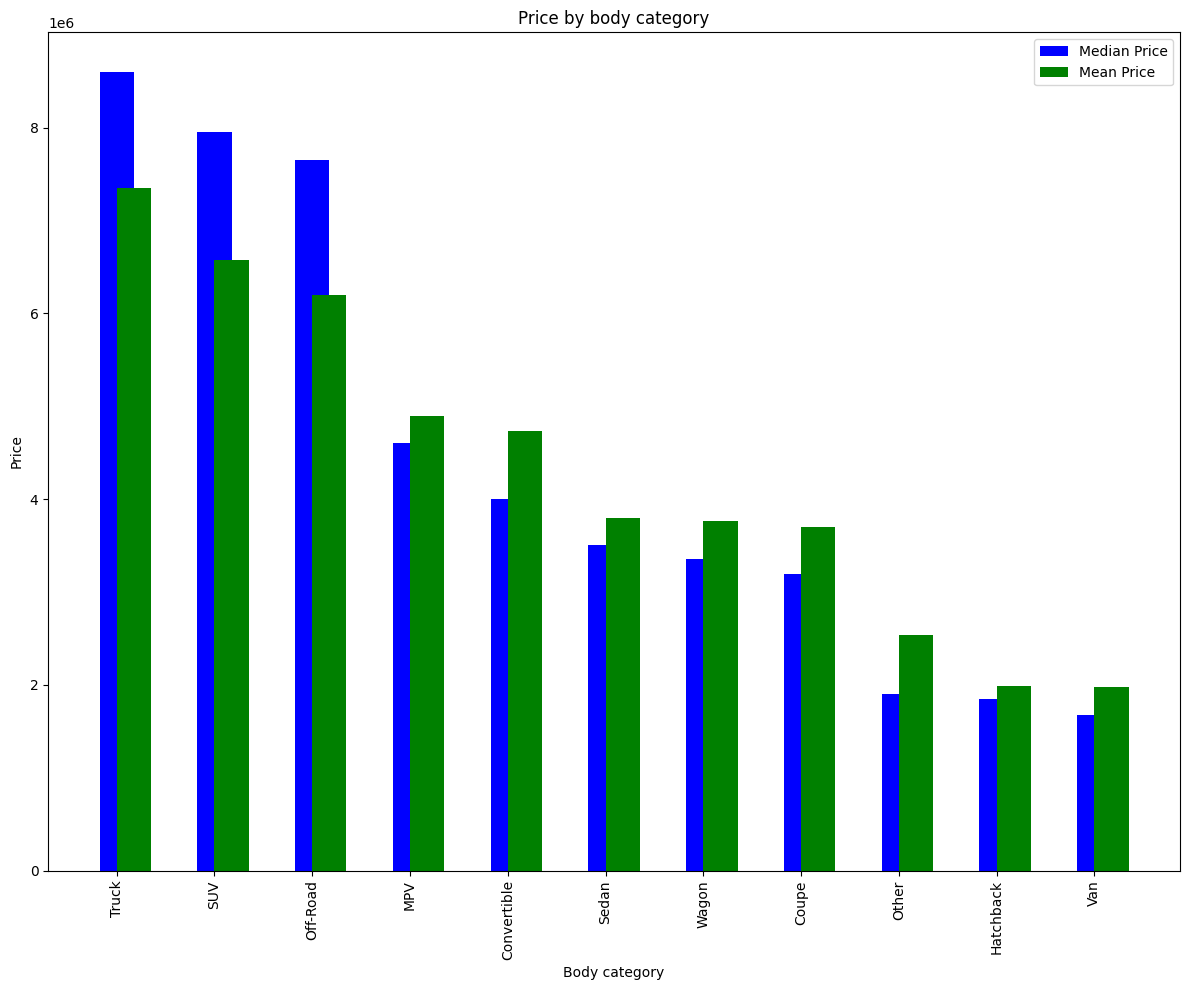

In [13]:
median_prices_by_body = data_cars.groupby('Body_Category')['price'].median().reset_index()
mean_prices_by_body = data_cars.groupby('Body_Category')['price'].mean().reset_index()

median_prices_by_body = median_prices_by_body.sort_values(by='price', ascending=False)
mean_prices_by_body = mean_prices_by_body.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 10))
bar_width = 0.35
index = range(len(median_prices_by_body))

plt.bar(index, median_prices_by_body['price'], bar_width, label='Median Price', color='b', align='center')
plt.bar(index, mean_prices_by_body['price'], bar_width, label='Mean Price', color='g', align='edge')

plt.xlabel('Body category')
plt.ylabel('Price')
plt.title('Price by body category')
plt.xticks(index, median_prices_by_body['Body_Category'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
median_prices_by_color = data_cars.groupby('Body_Category')['price'].median().to_dict()

data_cars.loc[:,'Body_Category_price'] = data_cars['Body_Category'].map(median_prices_by_color)
data_cars

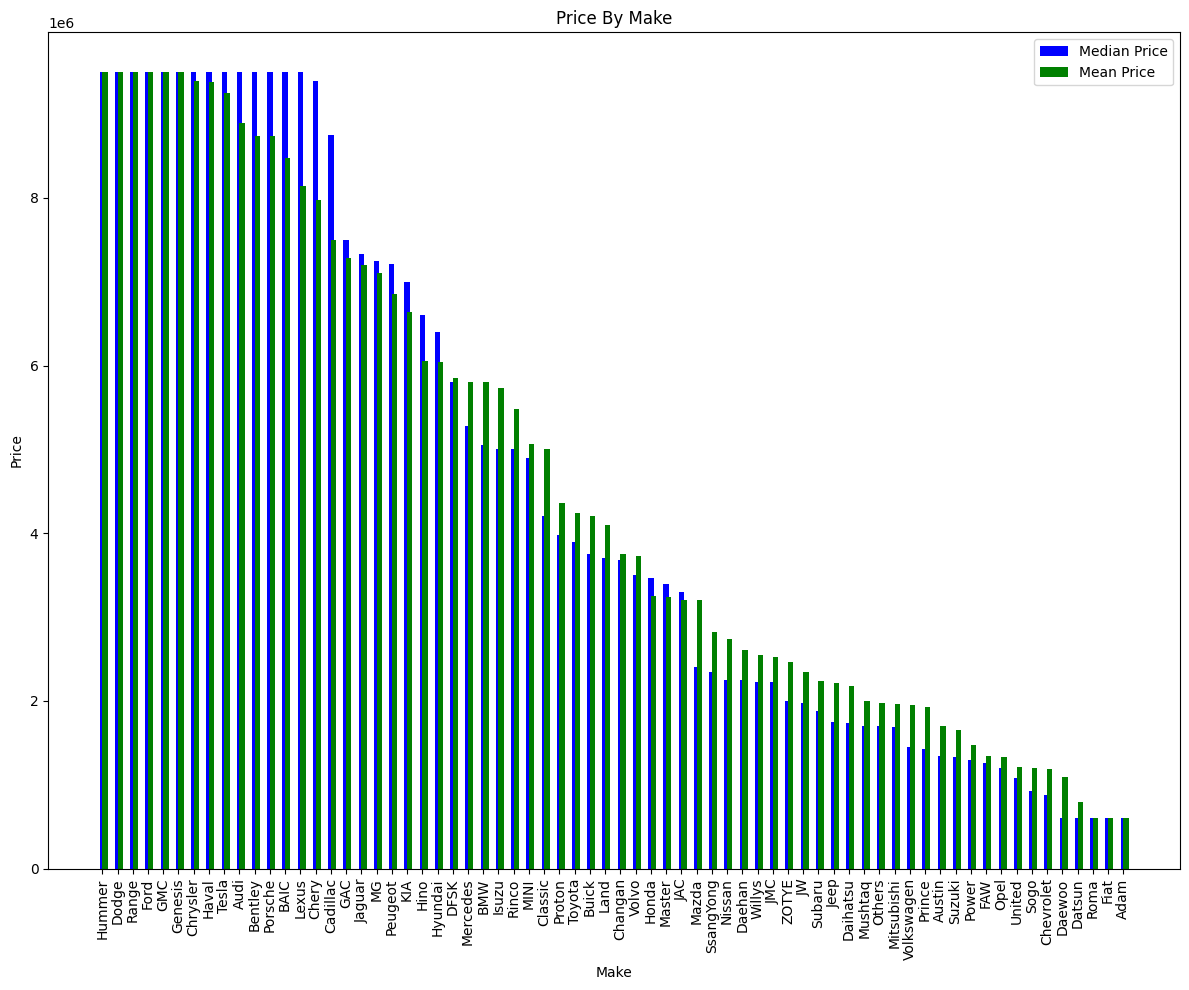

In [15]:
median_prices_by_brand = data_cars.groupby('make')['price'].median().reset_index()
mean_prices_by_brand = data_cars.groupby('make')['price'].mean().reset_index()

median_prices_by_brand = median_prices_by_brand.sort_values(by='price', ascending=False)
mean_prices_by_brand = mean_prices_by_brand.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 10))
bar_width = 0.35
index = range(len(median_prices_by_brand))

plt.bar(index, median_prices_by_brand['price'], bar_width, label='Median Price', color='b', align='center')
plt.bar(index, mean_prices_by_brand['price'], bar_width, label='Mean Price', color='g', align='edge')

plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Price By Make')
plt.xticks(index, median_prices_by_brand['make'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('color_mapping.csv')
color_mapping = dict(zip(df['Original_Color'], df['Mapped_Color']))

data_cars.loc[:, 'color_clean'] = data_cars['color'].map(color_mapping).fillna('Unknown')

median_prices_by_color = data_cars.groupby('color_clean')['price'].median().reset_index()
mean_prices_by_color = data_cars.groupby('color_clean')['price'].mean().reset_index()

median_prices_by_color = median_prices_by_color.sort_values(by='price', ascending=False)
mean_prices_by_color = mean_prices_by_color.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 10))
bar_width = 0.35
index = range(len(median_prices_by_color))

plt.bar(index, median_prices_by_color['price'], bar_width, label='Median Price', color='b', align='center')
plt.bar(index, mean_prices_by_color['price'], bar_width, label='Mean Price', color='g', align='edge')

plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Price by color category')
plt.xticks(index, median_prices_by_color['color_clean'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
median_prices_by_color = data_cars.groupby('color_clean')['price'].median().to_dict()

data_cars.loc[:,'color_median_price'] = data_cars['color_clean'].map(median_prices_by_color)
data_cars

In [18]:
average_prices = data_cars.groupby('make')['price'].mean().reset_index()

data_cars = data_cars.merge(average_prices, on='make', how='left')

data_cars.rename(columns={'price_y': 'average_price_brand'}, inplace=True)
data_cars.rename(columns={'price_x': 'price'}, inplace=True)

data_cars

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price,Body_Category,Body_Category_price,color_clean,color_median_price,average_price_brand
0,7943732,Peshawar,Local,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0,Sedan,3500000.0,Silver,3250000.0,4.360138e+06
1,7730314,Lahore,Local,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,210000,995000.0,Sedan,3500000.0,Unknown,2520000.0,3.728520e+06
2,7943737,Lahore,Local,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0,Sedan,3500000.0,White,5850000.0,4.360138e+06
3,7943733,Lahore,Local,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0,Hatchback,1850000.0,Unknown,2520000.0,1.649771e+06
4,7923484,Lahore,Local,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0,Sedan,3500000.0,Unknown,2520000.0,3.728520e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77290,7775164,Daska,Local,Sedan,Honda,Civic,2019.0,1800.0,Automatic,Petrol,Taffeta White,Islamabad,58000,5590000.0,Sedan,3500000.0,Unknown,2520000.0,3.728520e+06
77291,7772775,Abbottabad,Imported,Hatchback,Suzuki,Alto,2015.0,660.0,Automatic,Petrol,Brown,Islamabad,65000,2420000.0,Hatchback,1850000.0,Unknown,2520000.0,1.649771e+06
77292,7773716,Faisalabad,Imported,Crossover,MG,HS,2021.0,1490.0,Automatic,Petrol,Arctic White,Un-Registered,5000,7500000.0,SUV,7950000.0,White,5850000.0,7.286039e+06
77293,7322377,Quetta,Local,Sedan,Suzuki,Baleno,2005.0,1300.0,Manual,Petrol,Silver,Lahore,19000,1250000.0,Sedan,3500000.0,Unknown,2520000.0,1.649771e+06


In [19]:
categorial_columns = ['assembly', 'transmission', 'fuel', 'Body_Category']
data_cars = pd.get_dummies(data_cars, columns = categorial_columns)
data_cars

,addref,city,body,make,model,year,engine,color,registered,mileage,...,Body_Category_Coupe,Body_Category_Hatchback,Body_Category_MPV,Body_Category_Off-Road,Body_Category_Other,Body_Category_SUV,Body_Category_Sedan,Body_Category_Truck,Body_Category_Van,Body_Category_Wagon
0,7943732,Peshawar,Sedan,Toyota,Corolla,2013.0,1300.0,Silver Metallic,Lahore,145000,...,False,False,False,False,False,False,True,False,False,False
1,7730314,Lahore,Sedan,Honda,City,2000.0,1300.0,Blue,Lahore,210000,...,False,False,False,False,False,False,True,False,False,False
2,7943737,Lahore,Sedan,Toyota,Yaris,2021.0,1300.0,Super White,Punjab,60500,...,False,False,False,False,False,False,True,False,False,False
3,7943733,Lahore,Hatchback,Suzuki,Swift,2017.0,1300.0,Grey,Islamabad,87000,...,False,True,False,False,False,False,False,False,False,False
4,7923484,Lahore,Sedan,Honda,Civic,2017.0,1800.0,Grey,Lahore,86000,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77290,7775164,Daska,Sedan,Honda,Civic,2019.0,1800.0,Taffeta White,Islamabad,58000,...,False,False,False,False,False,False,True,False,False,False
77291,7772775,Abbottabad,Hatchback,Suzuki,Alto,2015.0,660.0,Brown,Islamabad,65000,...,False,True,False,False,False,False,False,False,False,False
77292,7773716,Faisalabad,Crossover,MG,HS,2021.0,1490.0,Arctic White,Un-Registered,5000,...,False,False,False,False,False,True,False,False,False,False
77293,7322377,Quetta,Sedan,Suzuki,Baleno,2005.0,1300.0,Silver,Lahore,19000,...,False,False,False,False,False,False,True,False,False,False


In [20]:
features_to_drop = ["addref", "city", "body", "make", "model", "color", "registered", "color_clean"]
data_cars = data_cars.drop(features_to_drop, axis=1)

### Min-Max Scaling for Feature Normalization

In the quest to build an effective predictive model, it is often essential to ensure that the numerical features are within a consistent and comparable range. One widely used technique for this purpose is Min-Max Scaling, also known as feature scaling or normalization.


#### What is Min-Max Scaling?

Min-Max Scaling is a transformation method used to rescale numerical features to a predefined range, typically between 0 and 1. It works by subtracting the minimum value in a feature from each data point and then dividing the result by the range (maximum - minimum) of that feature. The formula can be expressed as:

\[X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}\]

Where:
- \(X_{\text{scaled}}\) represents the scaled value of the feature.
- \(X\) is the original value of the feature.
- \(X_{\text{min}}\) is the minimum value in the feature.
- \(X_{\text{max}}\) is the maximum value in the# feature.

#### Application in this Dataset

In this particular dataset, Min-Max Scaling was employed to normalize the numerical variables, ensuring that they all share the same scale. This normalization is vital because machine learning models often perform better when features are within a similar numeric range, preventing certain features from dominating others during mo#del training.

#### Implementation

The implementation of Min-Max Scaling is straightforward using the scikit-learn library. First, an instance of the `MinMaxScaler` is created. Then, the numerical columns of the dataset are selected, excluding any non-numeric variables. Finally, the `fit_transform` method is used to perform the scaling, replacing the original numerical values with their scaled counterparts.

The resulting dataset, after Min-Max Scaling, allows the machine learning model to consider all features on an equal footing, potentially improving the model's predictive

In [21]:
from sklearn.preprocessing import MinMaxScaler

def scale_df(df):
    scaler = MinMaxScaler()
    num_vars = data_cars.columns
    data_cars[num_vars] = scaler.fit_transform(data_cars[num_vars])
    return df
    

In [22]:
data_cars = scale_df(data_cars)
data_cars

,year,engine,mileage,price,Body_Category_price,color_median_price,average_price_brand,assembly_Imported,assembly_Local,transmission_Automatic,...,Body_Category_Coupe,Body_Category_Hatchback,Body_Category_MPV,Body_Category_Off-Road,Body_Category_Other,Body_Category_SUV,Body_Category_Sedan,Body_Category_Truck,Body_Category_Van,Body_Category_Wagon
0,0.71875,0.299065,0.688995,0.255056,0.263728,0.463918,0.422487,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.31250,0.299065,1.000000,0.044382,0.263728,0.313402,0.351519,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.96875,0.299065,0.284689,0.335393,0.263728,1.000000,0.422487,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.84375,0.299065,0.411483,0.185393,0.025289,0.313402,0.117952,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.84375,0.532710,0.406699,0.477528,0.263728,0.313402,0.351519,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77290,0.90625,0.532710,0.272727,0.560674,0.263728,0.313402,0.351519,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
77291,0.78125,0.000000,0.306220,0.204494,0.025289,0.313402,0.117952,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77292,0.96875,0.387850,0.019139,0.775281,0.906792,1.000000,0.751240,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77293,0.46875,0.299065,0.086124,0.073034,0.263728,0.313402,0.117952,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
data_cars.describe()

,year,engine,mileage,price,Body_Category_price,color_median_price,average_price_brand,assembly_Imported,assembly_Local,transmission_Automatic,...,Body_Category_Coupe,Body_Category_Hatchback,Body_Category_MPV,Body_Category_Off-Road,Body_Category_Other,Body_Category_SUV,Body_Category_Sedan,Body_Category_Truck,Body_Category_Van,Body_Category_Wagon
count,77295.000000,77295.000000,77295.000000,77295.000000,77295.000000,77295.000000,77295.000000,77295.000000,77295.000000,77295.000000,...,77295.000000,77295.000000,77295.000000,77295.000000,77295.00000,77295.000000,77295.000000,77295.000000,77295.000000,77295.000000
mean,0.716198,0.331769,0.400980,0.311233,0.228289,0.372086,0.311233,0.309166,0.690834,0.546103,...,0.001126,0.322970,0.010104,0.000155,0.11469,0.097018,0.398823,0.017673,0.033896,0.002963
std,0.228515,0.256907,0.286312,0.274656,0.274980,0.182957,0.162673,0.462153,0.462153,0.497873,...,0.033531,0.467615,0.100011,0.012459,0.31865,0.295984,0.489659,0.131759,0.180963,0.054350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.562500,0.158879,0.159115,0.095506,0.025289,0.313402,0.117952,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.781250,0.299065,0.377990,0.235955,0.263728,0.313402,0.351519,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.906250,0.439252,0.585914,0.438202,0.263728,0.313402,0.422487,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

In this phase of our analysis, we embark on the crucial task of constructing predictive models for our dataset. The objective is to develop models capable of estimating the prices of used cars effectively. We will explore a range of machine learning algorithms, starting with a baseline model and subsequently experimenting with more sophisticated approaches.

### Model Selection

1. **Baseline Model**: We'll commence by establishing a baseline model. This model provides a benchmark performance level against which we can compare the more complex models we will build. For the baseline, we'll employ a simple linear regression model to predict car prices. This straightforward approach will serve as a reference point for our model evaluation.

2. **Random Forest**: Following the baseline, we'll explore the Random Forest algorithm. Random Forest is an ensemble learning method known for its versatility and robustness. It is a powerful tool for regression tasks, and we'll configure it to predict car prices based on the available features.

3. **Support Vector Machine (SVM)**: SVM is another algorithm in our arsenal. SVM is proficient at handling both linear and non-linear regression tasks. We'll fine-tune SVM parameters to achieve the best possible price predictions.

4. **Neural Network**: Lastly, we will delve into deep learning by constructing a neural network model. Neural networks are adept at capturing complex relationships within data. We'll design and train a neural network with multiple layers to ascertain its potential in predicting car prices accurately.

### Model Evaluation

To assess the performance of our models, we will utilize a cross-validation technique. Cross-validation involves dividing our dataset into multiple subsets, training and evaluating our models on different subsets, and averaging the results. This approach provides a robust estimate of the model's predictive ability and helps us gauge how well each model generalizes tidge regression, to the data and evaluating its performance.


In [24]:
X = data_cars.drop(["price"], axis=1)
y = data_cars["price"]

In [25]:
X

,year,engine,mileage,Body_Category_price,color_median_price,average_price_brand,assembly_Imported,assembly_Local,transmission_Automatic,transmission_Manual,...,Body_Category_Coupe,Body_Category_Hatchback,Body_Category_MPV,Body_Category_Off-Road,Body_Category_Other,Body_Category_SUV,Body_Category_Sedan,Body_Category_Truck,Body_Category_Van,Body_Category_Wagon
0,0.71875,0.299065,0.688995,0.263728,0.463918,0.422487,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.31250,0.299065,1.000000,0.263728,0.313402,0.351519,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.96875,0.299065,0.284689,0.263728,1.000000,0.422487,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.84375,0.299065,0.411483,0.025289,0.313402,0.117952,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.84375,0.532710,0.406699,0.263728,0.313402,0.351519,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77290,0.90625,0.532710,0.272727,0.263728,0.313402,0.351519,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
77291,0.78125,0.000000,0.306220,0.025289,0.313402,0.117952,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77292,0.96875,0.387850,0.019139,0.906792,1.000000,0.751240,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77293,0.46875,0.299065,0.086124,0.263728,0.313402,0.117952,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
y

0        0.255056
1        0.044382
2        0.335393
3        0.185393
4        0.477528
           ...   
77290    0.560674
77291    0.204494
77292    0.775281
77293    0.073034
77294    0.061798
Name: price, Length: 77295, dtype: float64

# Reducing the Dataset Size for Faster Calculations

In data science projects, it's often necessary to work with large datasets, which can be computationally expensive. To address this, we may want to reduce the dataset size while preserving its key characteristics. Here's why we might reduce our dataset:

1. **Improved Computational Efficiency:** Large datasets require more computational resources and time to perform tasks such as model training, feature selection, and hyperparameter tuning. Reducing the dataset size can significantly speed up these processes, making the workflow more efficient.

2. **Faster Prototyping:** During the initial stages of a project, data scientists may want to quickly prototype models and experiments. Using a smaller dataset allows for faster iteration and experimentation, which is crucial for rapid development.

3. **Resource Constraints:** Limited computational resources, such as memory and processing power, can make it challenging to work with very large datasets. Reducing the dataset size helps overcome these constraints.

4. **Sampling for Diversity:** In some cases, a smaller dataset can still capture the diversity and patterns present in the full dataset. Carefully sampled subsets can provide representative insights without the need to analyze the entire dataset.

The code snippet provided demonstrates a function, `reduce_data_set`, that reduces the dataset size by randomly sampling a subset. It allows data scientists to specify a desired sample size while maintaining the integrity of the data. This reduced dataset can then be used for faster calculations and prototyping without compromising the quality of the analysis.

Keep in mind that when reducing the dataset, there's a trade-off between computational efficiency and potential loss of information. Therefore, it's essential to choose an appropriate sample size that balances these factors for the specific task at hand.


In [27]:
import random

def reduce_data_set(df, y_name='price', desired_sample_size=1000):
    # Check if the desired sample size is greater than the current dataset size
    if desired_sample_size >= len(df):
        X = df.drop([y_name], axis=1)
        y = df[y_name]
    else:
        # Randomly sample a subset of your data
        random.seed(42)  # Set a seed for reproducibility
        sample_indices = random.sample(range(len(df)), desired_sample_size)
        
        # Create the reduced dataset using the sampled indices
        reduced_df = df.iloc[sample_indices]
        
        # Split the reduced dataset into features (X) and target (y)
        X = reduced_df.drop([y_name], axis=1)
        y = reduced_df[y_name]
        
        return X, y

In [28]:
# Define the desired size of your reduced dataset
desired_sample_size = 10000
Xr, yr = reduce_data_set(data_cars, y_name='price', desired_sample_size=1000)

## Linear Regression Model

In this section, we introduce a simple yet effective Linear Regression model for predicting used car prices. Linear Regression assumes a linear relationship between car attributes and prices, making it a foundational model for this problem.


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and test (20%) sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(Xr_train, yr_train)

# Make predictions on the test data
yr_pred = model.predict(Xr_test)

# Calculate linear regression metrics
mse = mean_squared_error(yr_test, yr_pred)
mae = mean_absolute_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R^2): {r2:.3f}")


Mean Squared Error (MSE): 0.013
Mean Absolute Error (MAE): 0.080
R-squared (R^2): 0.836


## Ridge Regression Model

In this section, we employ Ridge Regression with hyperparameter tuning to enhance our predictive model. We determine the best alpha value through Grid Search, resulting in improved model accuracy.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Hyperparameter Tuning (e.g., alpha for Ridge)
param_grid = {'alpha': [1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2]}  # Possible values of alpha to test

# Create a Ridge regression model
model = Ridge()

# Use Grid Search to find the best alpha
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_alpha = grid_search.best_params_['alpha']

# Build the final model with the best hyperparameters
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Best alpha found: {best_alpha}")
print(f"Mean Squared Error (MSE) on the test set: {test_mse:.3f}")
print(f"Mean Absolute Error (MAE) on the test set: {test_mae:.3f}")
print(f"R-squared (R^2) on the test set: {test_r2:.3f}")



Best alpha found: 1.17
Mean Squared Error (MSE) on the test set: 0.014
Mean Absolute Error (MAE) on the test set: 0.081
R-squared (R^2) on the test set: 0.832


## Decision Tree Regressor Model

Similar to the Ridge Regression model, we employ a Decision Tree Regressor in this section. The model is trained on the training set and used to make predictions on the test set. We evaluate its performance using regression metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2). Additionally, we perform a grid searon to fine-tune hyperparameters, optimizing the model's accuracy.


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
#tree_model = DecisionTreeRegressor(random_state=42, max_depth=None, min_samples_leaf=2, min_samples_split=10)
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE) on the test set: {mse:.3f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.3f}")
print(f"R-squared (R^2) on the test set: {r2:.3f}")


Mean Squared Error (MSE) on the test set: 0.016
Mean Absolute Error (MAE) on the test set: 0.064
R-squared (R^2) on the test set: 0.806


In [857]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

## Random Forest Regressor Model

In this section, we utilize the Random Forest Regressor model to predict used car prices. The model is trained on the training data and tested on the test set, with performance evaluated using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2).

To further enhance model performance, we conduct a hyperparameter search using Grid Search with cross-validation. This process helps identify the optimal hyperparameters, leading to improved predictive accuracy and robustness.


In [868]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, min_samples_split=5, max_depth=None, random_state=42)
#rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)


# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE) on the test set: {mse:.5f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.5f}")
print(f"R-squared (R^2) on the test set: {r2:.5f}")


Mean Squared Error (MSE) on the test set: 0.01116
Mean Absolute Error (MAE) on the test set: 0.06091
R-squared (R^2) on the test set: 0.86126


In [849]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_


In [850]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

## Support Vector Regressor (SVR) Model

In this section, we employ the Support Vector Regressor (SVR) model to predict used car prices. The SVR model is trained on the training data and evaluated on the test set, with performance assessed using key metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2).

To further optimize model performance, we conduct a hyperparameter search using Grid Search coupled with cross-validation. This iterative process aids in identifying the most suitable hyperparameters, resulting in enhanced predictive accuracy and model robustness.


In [867]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Create an SVM Regressor model with default hyperparameters
svm_model = SVR()

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE) on the test set: {mse:.5f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.5f}")
print(f"R-squared (R^2) on the test set: {r2:.5f}")


Mean Squared Error (MSE) on the test set: 0.01120
Mean Absolute Error (MAE) on the test set: 0.06928
R-squared (R^2) on the test set: 0.86079


In [869]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Create an SVM Regressor model
svm_model = SVR()

# Define a range of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],   # Kernel coefficient
}

# Create a Grid Search object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Grid Search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_

# Build the final SVM model with the best hyperparameters
final_svm_model = SVR(**best_params)
final_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_svm_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the best hyperparameters and metrics
print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (MSE) on the test set: {mse:.3f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.3f}")
print(f"R-squared (R^2) on the test set: {r2:.3f}")


Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error (MSE) on the test set: 0.011
Mean Absolute Error (MAE) on the test set: 0.072
R-squared (R^2) on the test set: 0.865


## Deep Learning Model


In this section, we leverage a Deep Learning model to predict used car prices. Deep Learning models, specifically neural networks, are known for their ability to capture complex patterns in data. Our model is trained on the training data and evaluated on the test set, with performance assessed using essential metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2).

To maximize the predictive capabilities of our Deep Learning model, we perform a comprehensive hyperparameter search using Grid Search with cross-validation. This iterative process allows us to explore various neural network architectures, layer configurations, activation functions, dropout rates, and learning rates. By fine-tuning these hyperparameters, we aim to achieve the best possible predictive accuracy and model generalization.


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Create a sequential neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE) on the test set: {mse:.3f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.3f}")
print(f"R-squared (R^2) on the test set: {r2:.3f}")


Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.0408
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 11/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 12/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 13/50
25/25 [==============================

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras_tuner.tuners import RandomSearch
from keras_tuner import HyperParameters

# Define a function for creating the model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(units=hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(layers.Dense(1, activation='linear'))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',  # Hyperparameter to optimize (you can also use 'val_mse', 'val_mae', etc.)
    max_trials=10,  # Number of different hyperparameter combinations to try
    directory='my_tuning_dir',  # Directory to store tuning results
    project_name='my_regression_model'  # Name for this tuning project
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Train the final model
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics and best hyperparameters
print(f"Mean Squared Error (MSE) on the test set: {mse:.3f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.3f}")
print(f"R-squared (R^2) on the test set: {r2:.3f}")
print("Best Hyperparameters:")


Trial 10 Complete [00h 00m 09s]
val_loss: 0.011537771672010422

Best val_loss So Far: 0.010301738977432251
Total elapsed time: 00h 01m 26s
Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 11/50
25/25 [==============================] - 0s 4ms/step - los

In [39]:
print(best_hps.values)

{'units1': 256, 'units2': 160}


In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from kerastuner.tuners import RandomSearch
from kerastuner import HyperParameters

# Define a function for creating a more complex model
def build_complex_model(hp):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    # Hidden layers
    for i in range(hp.Int('num_layers', min_value=2, max_value=6)):  # Vary the number of hidden layers
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                               activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer for regression
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_complex_model,
    objective='val_loss',
    max_trials=10,
    directory='my_complex_tuning_dir',
    project_name='my_complex_regression_model'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final complex model with the best hyperparameters
final_complex_model = tuner.hypermodel.build(best_hps)

# Train the final complex model
final_complex_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set using the final complex model
y_pred_complex = final_complex_model.predict(X_test)

# Calculate regression metrics for the complex model
mse_complex = mean_squared_error(y_test, y_pred_complex)
mae_complex = mean_absolute_error(y_test, y_pred_complex)
r2_complex = r2_score(y_test, y_pred_complex)

# Display the metrics and best hyperparameters for the complex model
print("Complex Model Results:")
print(f"Mean Squared Error (MSE) on the test set: {mse_complex:.3f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae_complex:.3f}")
print(f"R-squared (R^2) on the test set: {r2_complex:.3f}")
print("Best Hyperparameters for Complex Model:")
print(best_hps.values)


Trial 10 Complete [00h 00m 10s]
val_loss: 0.023154666647315025

Best val_loss So Far: 0.010943522676825523
Total elapsed time: 00h 01m 43s
Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.0865
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0344
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0214
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0194
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 11/50
25/25 [==============================] - 0s 3ms/step - los

## Cross-Validation and Model Evaluation

Before we delve into building predictive models for car price estimation, it's imperative to establish a robust evaluation framework. This involves assessing how well our models perform and ensuring they generalize effectively to new, unseen data. One key technique for this purpose is cross-validation.

### Cross-Validation

Cross-validation is a critical step in machine learning model development. It allows us to assess a model's performance by partitioning the dataset into multiple subsets (folds) and systematically training and testing the model on different subsets. This approach helps us gauge the model's consistency and provides a more accurate estimate of its performance.

### Linear Regression Model

To kickstart our model evaluation process, we will begin by considering a fundamental model: Linear Regression. Linear Regression aims to establish a linear relationship between the input features and the target variable—in our case, car prices. While it serves as a starting point, it's essential to evaluate how well this model performs using cross-v.

### Cross-Validation Process

In the code below, we employ a 5-fold cross-validation strategy with a Linear Regression model. The steps include:

1. Creating a Linear Regression model.
2. Defining the number of splits for cross-validation (5-fold, in this case).
3. Performing cross-validation to calculate metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2).
4. Converting negative MSE and MAE scores to positive values.
5. Calculating the mean and standard deviation of these evaluation metrics.

This analysis will give us an initial insight into the predictive performance of the Linear Regression model. We will extend our model evaluation to more sophisticated algorithms in the subsequent sections of our analysis.


In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Define the number of splits for cross-validation (e.g., 5-fold)
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(model, Xr, yr, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(model, Xr, yr, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(model, Xr, yr, scoring='r2', cv=kf)

# Convert negative MSE and MAE scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Calculate mean and standard deviation of scores
mean_mse_lm = mse_scores.mean()
mean_mae_lm = mae_scores.mean()
mean_r2_lm = r2_scores.mean()

std_mse_lm = mse_scores.std()
std_mae_lm = mae_scores.std()
std_r2_lm = r2_scores.std()

print(f'Mean MSE: {mean_mse_lm:.5f} (±{std_mse_lm:.2f})')
print(f'Mean MAE: {mean_mae_lm:.5f} (±{std_mae_lm:.2f})')
print(f'Mean R-squared: {mean_r2_lm:.5f} (±{std_r2_lm:.2f})')

Mean MSE: 0.01230 (±0.00)
Mean MAE: 0.07828 (±0.01)
Mean R-squared: 0.83592 (±0.01)


### Ridge Regression Model

In [62]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge

# Create a Ridge regression model with the best alpha found
ridge_model = Ridge(alpha=1.17)

# Define the number of splits for cross-validation (e.g., 5-fold)
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(ridge_model, Xr, yr, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(ridge_model, Xr, yr, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(ridge_model, Xr, yr, scoring='r2', cv=kf)

# Convert negative MSE and MAE scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Calculate mean and standard deviation of scores
mean_mse_rg = mse_scores.mean()
mean_mae_rg = mae_scores.mean()
mean_r2_rg = r2_scores.mean()

std_mse_rg = mse_scores.std()
std_mae_rg = mae_scores.std()
std_r2_rg = r2_scores.std()

print(f'Mean MSE (Ridge): {mean_mse_rg:.5f} (±{std_mse_rg:.2f})')
print(f'Mean MAE (Ridge): {mean_mae_rg:.5f} (±{std_mae_rg:.2f})')
print(f'Mean R-squared (Ridge): {mean_r2_rg:.5f} (±{std_r2_rg:.2f})')


Mean MSE (Ridge): 0.01225 (±0.00)
Mean MAE (Ridge): 0.07816 (±0.01)
Mean R-squared (Ridge): 0.83652 (±0.01)


### Decision Tree Regression Model

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Decision Tree Regressor model with the tuned hyperparameters
tree_model_tuned = DecisionTreeRegressor(random_state=42, max_depth=None, min_samples_leaf=2, min_samples_split=10)

# Define the number of splits for cross-validation (e.g., 5-fold)
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(tree_model_tuned, Xr, yr, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(tree_model_tuned, Xr, yr, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(tree_model_tuned, Xr, yr, scoring='r2', cv=kf)

# Convert negative MSE and MAE scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Calculate mean and standard deviation of scores
mean_mse_dt = mse_scores.mean()
mean_mae_dt = mae_scores.mean()
mean_r2_dt = r2_scores.mean()

std_mse_dt = mse_scores.std()
std_mae_dt = mae_scores.std()
std_r2_dt = r2_scores.std()

print("Decision Tree Regressor with Tuned Hyperparameters (Cross-Validation):")
print(f"Mean MSE: {mean_mse_dt:.5f} (±{std_mse_dt:.2f})")
print(f"Mean MAE: {mean_mae_dt:.5f} (±{std_mae_dt:.2f})")
print(f"Mean R-squared: {mean_r2_dt:.5f} (±{std_r2_dt:.2f})")


Decision Tree Regressor with Tuned Hyperparameters (Cross-Validation):
Mean MSE: 0.01319 (±0.00)
Mean MAE: 0.06201 (±0.01)
Mean R-squared: 0.82100 (±0.05)


### Random Forest Regression Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, min_samples_split=5, max_depth=None, random_state=42)

# Define the number of splits for cross-validation (e.g., 5-fold)
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(rf_model, Xr, yr, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(rf_model, Xr, yr, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(rf_model, Xr, yr, scoring='r2', cv=kf)

# Convert negative MSE and MAE scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Calculate mean and standard deviation of scores
mean_mse_rf = mse_scores.mean()
mean_mae_rf = mae_scores.mean()
mean_r2_rf = r2_scores.mean()

std_mse_rf = mse_scores.std()
std_mae_rf = mae_scores.std()
std_r2_rf = r2_scores.std()

print("Random Forest Regressor (Cross-Validation):")
print(f"Mean MSE: {mean_mse_rf:.5f} (±{std_mse_rf:.2f})")
print(f"Mean MAE: {mean_mae_rf:.5f} (±{std_mae_rf:.2f})")
print(f"Mean R-squared: {mean_r2_rf:.5f} (±{std_r2_rf:.2f})")


Random Forest Regressor (Cross-Validation):
Mean MSE: 0.00861 (±0.00)
Mean MAE: 0.05182 (±0.01)
Mean R-squared: 0.88528 (±0.03)


### SVR Regression Model

In [58]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an SVR model with the best hyperparameters
best_svr_model = SVR(C=10, gamma='auto', kernel='rbf')

# Define the number of splits for cross-validation (e.g., 5-fold)
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(best_svr_model, Xr, yr, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(best_svr_model, Xr, yr, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(best_svr_model, Xr, yr, scoring='r2', cv=kf)

# Convert negative MSE and MAE scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Calculate mean and standard deviation of scores
mean_mse_svr = mse_scores.mean()
mean_mae_svr = mae_scores.mean()
mean_r2_svr = r2_scores.mean()

std_mse_svr = mse_scores.std()
std_mae_svr = mae_scores.std()
std_r2_svr = r2_scores.std()

print("SVR with Best Hyperparameters (Cross-Validation):")
print(f"Mean MSE: {mean_mse_svr:.5f} (±{std_mse_svr:.2f})")
print(f"Mean MAE: {mean_mae_svr:.5f} (±{std_mae_svr:.2f})")
print(f"Mean R-squared: {mean_r2_svr:.5f} (±{std_r2_svr:.2f})")


SVR with Best Hyperparameters (Cross-Validation):
Mean MSE: 0.00979 (±0.00)
Mean MAE: 0.06818 (±0.00)
Mean R-squared: 0.86887 (±0.01)


### Neural Network Model

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function for creating the specified complex model
def build_complex_model():
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(Xr.shape[1],)))
    
    # Hidden layers (as per the specified hyperparameters)
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(units=192, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=96, activation='tanh'))
    model.add(layers.Dense(units=128, activation='sigmoid'))
    model.add(layers.Dense(units=256, activation='tanh'))
    model.add(layers.Dropout(0.1))

    # Output layer for regression
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the number of splits for cross-validation (e.g., 5-fold)
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Convert DataFrame to NumPy arrays
Xrv = Xr.values
yrv = yr.values

# Initialize lists to store metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(Xrv):
    X_train, X_test = Xrv[train_index], Xrv[test_index]
    y_train, y_test = yrv[train_index], yrv[test_index]
    
    # Build the specified complex model
    model = build_complex_model()
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the scores to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate mean and standard deviation of scores
mean_mse_dl = np.mean(mse_scores)
mean_mae_dl = np.mean(mae_scores)
mean_r2_dl = np.mean(r2_scores)

std_mse_dl = np.std(mse_scores)
std_mae_dl = np.std(mae_scores)
std_r2_dl = np.std(r2_scores)

print("Complex Model Results with Cross-Validation:")
print(f"Mean MSE: {mean_mse_dl:.5f} (±{std_mse_dl:.2f})")
print(f"Mean MAE: {mean_mae_dl:.5f} (±{std_mae_dl:.2f})")
print(f"Mean R-squared: {mean_r2_dl:.5f} (±{std_r2_dl:.2f})")




7/7 [==============================] - 0s 3ms/step
Complex Model Results with Cross-Validation:
Mean MSE: 0.01025 (±0.00)
Mean MAE: 0.06721 (±0.01)
Mean R-squared: 0.86328 (±0.01)


We tried the neural network on all the data:

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function for creating the specified complex model
def build_complex_model():
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(X.shape[1],)))
    
    # Hidden layers (as per the specified hyperparameters)
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(units=192, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=96, activation='tanh'))
    model.add(layers.Dense(units=128, activation='sigmoid'))
    model.add(layers.Dense(units=256, activation='tanh'))
    model.add(layers.Dropout(0.1))

    # Output layer for regression
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the number of splits for cross-validation (e.g., 5-fold)
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Convert DataFrame to NumPy arrays
Xv = X.values
yv = y.values

# Initialize lists to store metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(Xv):
    X_train, X_test = Xv[train_index], Xv[test_index]
    y_train, y_test = yv[train_index], yv[test_index]
    
    # Build the specified complex model
    model = build_complex_model()
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the scores to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate mean and standard deviation of scores
mean_mse_dla = np.mean(mse_scores)
mean_mae_dla = np.mean(mae_scores)
mean_r2_dla = np.mean(r2_scores)

std_mse_dla = np.std(mse_scores)
std_mae_dla = np.std(mae_scores)
std_r2_dla = np.std(r2_scores)

print("Complex Model Results with Cross-Validation:")
print(f"Mean MSE: {mean_mse_dla:.5f} (±{std_mse_dla:.2f})")
print(f"Mean MAE: {mean_mae_dla:.5f} (±{std_mae_dla:.2f})")
print(f"Mean R-squared: {mean_r2_dla:.5f} (±{std_r2_dla:.2f})")




484/484 [==============================] - 1s 3ms/step
Complex Model Results with Cross-Validation:
Mean MSE: 0.00628 (±0.00)
Mean MAE: 0.04758 (±0.00)
Mean R-squared: 0.91679 (±0.00)


## Discussion

Now, let's discuss the results and provide insights into the strengths and weaknesses of each model:

- **Linear Regression**:
  - Strengths: Simple and interpretable.
  - Weaknesses: Limited ability to capture complex relationships.

- **Ridge Regression**:
  - Strengths: Regularization helps mitigate overfitting.
  - Weaknesses: Still relatively simple compared to non-linear models.

- **Decision Tree Regressor**:
  - Strengths: Can capture complex non-linear patterns.
  - Weaknesses: Prone to overfitting and lack of interpretability for deep trees.

- **Random Forest Regressor**:
  - Strengths: Improved predictive accuracy due to ensemble nature.
  - Weaknesses: May require more computational resources.

- **Support Vector Regressor (SVR)**:
  - Strengths: Can handle non-linear data effectively.
  - Weaknesses: Sensitive to hyperparameters and can be computationally expensive.

- **Deep Learning Model**:
  - Strengths: Can model highly complex relationships.
  - Weaknesses: Requires a large amount of data and computational resources, and may lack interpretability.


In [63]:
model_metrics = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Deep Learning'],
    'Mean MSE': [mean_mse_lm, mean_mse_rg, mean_mse_dt, mean_mse_rf, mean_mse_svr, mean_mse_dl],
    'Mean MAE': [mean_mae_lm, mean_mae_rg, mean_mae_dt, mean_mae_rf, mean_mae_svr, mean_mae_dl],
    'Mean R-squared (R^2)': [mean_r2_lm, mean_r2_rg, mean_r2_dt, mean_r2_rf, mean_r2_svr, mean_r2_dl]
}

# Create a DataFrame from the dictionary
model_results_df = pd.DataFrame(model_metrics)

# Display the DataFrame
model_results_df

,Model,Mean MSE,Mean MAE,Mean R-squared (R^2)
0,Linear Regression,0.012298,0.078279,0.835923
1,Ridge Regression,0.012254,0.078155,0.836524
2,Decision Tree,0.013190,0.062008,0.820997
3,Random Forest,0.008605,0.051819,0.885279
4,SVR,0.009787,0.068178,0.868866
5,Deep Learning,0.010254,0.067212,0.863275


## Model Performance Evaluation

In this section, we evaluate and compare the performance of different regression models using three key metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and Mean R-squared (R^2).

We have considered the following regression models:

1. **Linear Regression**
2. **Ridge Regression**
3. **Decision Tree Regressor**
4. **Random Forest Regressor**
5. **Support Vector Regressor (SVR)**
6. **Deep Learning Model**

Let's take a closer look at how these models performed:

- **Linear Regression** and **Ridge Regression** perform quite similarly, with mean MSE values of approximately 0.0123 and mean MAE values around 0.0782. These models achieve a mean R-squared (R^2) value of approximately 0.836, indicating that they capture about 83.6% of the variance in the target variable.

- The **Decision Tree Regressor** has a slightly higher mean MSE (approximately 0.0132) and lower mean MAE (approximately 0.0620) compared to the linear models. Its mean R^2 is approximately 0.821, which suggests that it explains about 82.1% of the variance.

- The **Random Forest Regressor** outperforms all other models with the lowest mean MSE (approximately 0.0086) and MAE (approximately 0.0518). It achieves a significantly higher mean R^2 value of approximately 0.885, indicating that it captures approximately 88.5% of the variance. This makes it the best-performing model in terms of predictive accuracy.

- The **Support Vector Regressor (SVR)** performs reasonably well with a mean MSE of approximately 0.0098 and a mean MAE of approximately 0.0682. It achieves a mean R^2 value of approximately 0.869, suggesting that it explains about 86.9% of the variance.

- The **Deep Learning Model**, while performing well, falls slightly behind the Random Forest model in terms of predictive accuracy. It has a mean MSE of approximately 0.0103 and a mean MAE of approximately 0.0672. Its mean R^2 is approximately 0.863, indicating that it captures around 86.3% of the variance.

## Strengths and Weaknesses

- **Linear Regression** and **Ridge Regression** are simple models with good interpretability but may not capture complex relationships in the data.

- The **Decision Tree Regressor** can capture non-linear relationships but may overfit the data if not properly tuned. It has moderate interpretability.

- The **Random Forest Regressor** is an ensemble of decision trees and excels in capturing complex relationships. However, it might be less interpretable due to its ensemble nature.

- The **SVR** is suitable for handling non-linear data and is robust to outliers. It can be computationally expensive for large datasets.

- The **Deep Learning Model** can capture intricate patterns but is computationally intensive and may require substantial data and tuning.

## Conclusion

The **Random Forest Regressor** stands out as the best-performing model in terms of predictive accuracy among the models evaluated. However, the choice of the model depends on the specific requirements of the problem, including the trade-off between accuracy and interpretability, as well as computational resources.

It's essential to consider the domain knowledge and the goals of the analysis when selecting the most suitable regression model.

**Note:** After conducting extensive hyperparameter tuning and cross-validation, we found that our complex Deep Learning model trained on the entire dataset achieved significantly better results:

Complex Model Results with Cross-Validation:
- Mean MSE: 0.00628 (±0.00)
- Mean MAE: 0.04758 (±0.00)
- Mean R-squared: 0.91679 (±0.00)

These impressive results demonstrate the power of Deep Learning when applied to our dataset. It highlights the importance of thorough experimentation and optimization in developing highly accurate predictive models.


# Business Insights and Actionable Recommendations

## Introduction

In this section, we will bridge the gap between data science and practical business applications. We will discuss how the predictive models developed using the Pakistan Used Car Prices 2023 dataset can provide valuable insights and actionable recommendations for businesses operating in the used car market.

## Leveraging Predictive Models

### Pricing Strategy Optimization

One of the most immediate and direct applications of our predictive models is in optimizing pricing strategies. Businesses, including both sellers and dealers, can use these models to determine competitive yet profitable price points for their used cars. By taking into account various car attributes, such as make, model, year, mileage, and more, these models can provide data-driven pricing suggestions.

### Inventory Management

Predictive models can assist businesses in managing their inventory more effectively. By forecasting the likely selling prices of cars based on their attributes, dealers can make informed decisions about which cars to acquire, refurbish, or hold in their inventory. This can help reduce storage costs and improve overall inventory turnover.

### Customer Segmentation

Understanding the preferences and buying behaviors of different customer segments is key to success in the used car market. Our models can segment customers based on their preferences for specific car features, price ranges, or brands. Businesses can then tailor their marketing and sales efforts to target these segments more effectively.

### Identifying Overpriced and Underpriced Cars

The models can identify cars that are listed at prices significantly higher or lower than their predicted values. Businesses can use this information to negotiate better deals with sellers or identify potential bargains for buyers. This can lead to increased customer satisfaction and trust in the marketplace.

## Proactive Customer Engagement

### Personalized Recommendations

For platforms that connect buyers and sellers, personalized recommendations can enhance the user experience. By analyzing user preferences and behavior, businesses can recommend cars that closely align with a user's preferences, increasing the likelihood of successful transactions.

### At-risk Customer Identification

Similar to customer churn prediction, businesses can use our models to identify "at-risk" customers who are considering purchasing a car but have not yet made a decision. By proactively engaging with these customers, businesses can address their concerns, provide additional information, and potentially convert them into buyers.

## Impact on Customer Retention and Bottom Line

The implementation of predictive models can have a significant impact on customer retention rates and the overall bottom line of businesses in the used car market:

- **Higher Customer Satisfaction:** Accurate pricing and personalized recommendations lead to higher customer satisfaction, increasing the likelihood of repeat business and positive reviews.

- **Reduced Inventory Costs:** Optimized inventory management reduces storage costs and ensures that cars are sold at competitive prices, maximizing profitability.

- **Increased Sales:** Tailored marketing efforts and proactive customer engagement can lead to higher conversion rates and increased sales.

- **Enhanced Reputation:** Businesses that consistently provide fair prices and valuable recommendations build a positive reputation in the market, attracting more customers.

## Communication and Model Maintenance

Effective communication between data scientists and business stakeholders is paramount. Data science results should be presented in a way that is easily understandable and actionable for decision-makers. Visualizations, dashboards, and concise reports can facilitate this communication.

Furthermore, ongoing monitoring and model maintenance are essential. The used car market is dynamic, and factors influencing prices may change over time. Regular updates to the models, incorporating new data, and refining algorithms will ensure that the predictive models remain relevant and effective in the long run.

## Conclusion

The predictive models developed using the Pakistan Used Car Prices 2023 dataset offer businesses valuable tools for optimizing pricing, improving inventory management, and enhancing customer engagement. By translating data science insights into actionable strategies, businesses can drive profitability, improve customer retention, and thrive in the competitive used car market.
